In [1]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Input, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [2]:
train = pd.read_csv('train.csv')

In [3]:
print(train.shape)

(42000, 785)


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
labels = np.array(train['label'])

In [6]:
labels.shape

(42000,)

In [7]:
train = train.drop(columns=['label'])
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = np.array(train)/255
X = X.reshape(42000, 28, 28, 1)
Y = to_categorical(labels, 10)

In [9]:
print(Y[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


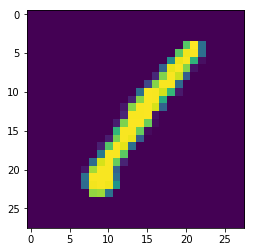

In [10]:
plt.imshow(np.array(train.iloc[0]).reshape(28,28))

In [95]:
def model(input_shape):
    
    X_input = Input(shape = input_shape)
    
    # Step 1: CONV layer (≈4 lines)
    X = Conv2D(128, kernel_size=(3, 3), strides=2, input_shape=(28,28,1), activation='relu') (X_input)                    
    X = Dropout(0.3)(X)
    X = BatchNormalization(axis=-1)(X)
    X = Conv2D(128, (3, 3), activation='relu')(X)
    X = Dropout(0.2)(X)
    #X = MaxPooling2D((2), strides=2, padding='valid')(X)                              
    X = BatchNormalization(axis=-1)(X)
    X = Conv2D(128,(3, 3), activation='relu')(X)
    X = Dropout(0.1)(X)
    X = BatchNormalization(axis=-1)(X)
    X = Conv2D(128,(3, 3), activation='relu')(X)
    X = Activation('relu')(X)
    #X = Dropout(0.3)(X)
    #X = MaxPooling2D(pool_size=(2,2))(X)
    X = BatchNormalization(axis=-1)(X)
    X = Flatten()(X)
    X = Dense(512)(X)
    X = Activation('relu')(X)
    X = Dense(256)(X)
    X = Activation('relu')(X)
    X = Dense(128)(X)
    X = Activation('relu')(X)
    X = Dense(64)(X)
    X = Dropout(0.3)(X)
    X = Activation('relu')(X)
    X = Dense(10)(X)
    X = Activation("softmax")(X)
    
   
    model = Model(inputs = X_input, outputs = X)
    
    return model  

In [96]:
model = model(input_shape = (28, 28, 1))

In [97]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 13, 13, 128)       1280      
_________________________________________________________________
dropout_20 (Dropout)         (None, 13, 13, 128)       0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 13, 13, 128)       512       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 11, 11, 128)       147584    
_________________________________________________________________
dropout_21 (Dropout)         (None, 11, 11, 128)       0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 11, 11, 128)       512       
__________

In [98]:
opt = Adam(lr=0.0011, beta_1=0.9, beta_2=0.999, decay=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])

In [99]:
model.fit(X, Y, batch_size = 500, epochs=5)#, validation_split = .2)

Epoch 1/5
42000/42000 [==============================] - 158s 4ms/step - loss: 0.0488 - acc: 0.9841
Epoch 2/5
42000/42000 [==============================] - 157s 4ms/step - loss: 0.0124 - acc: 0.9963
Epoch 3/5
42000/42000 [==============================] - 158s 4ms/step - loss: 0.0077 - acc: 0.9977
Epoch 4/5
42000/42000 [==============================] - 157s 4ms/step - loss: 0.0057 - acc: 0.9983
Epoch 5/5
42000/42000 [==============================] - 158s 4ms/step - loss: 0.0043 - acc: 0.9988


In [100]:
test = pd.read_csv('test.csv')
print(test.shape)
X_test = np.array(test)/255
X_test = X_test.reshape(test.shape[0], 28, 28, 1)

(28000, 784)


In [101]:
pred = model.predict(X_test)

In [102]:
print(pred.shape)

(28000, 10)


9


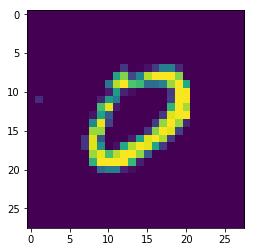

7


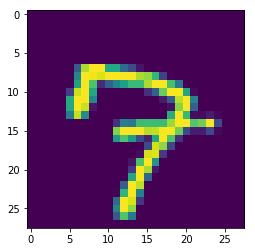

0


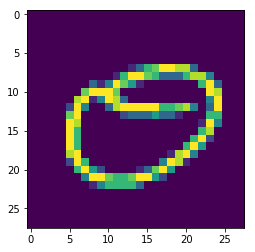

3


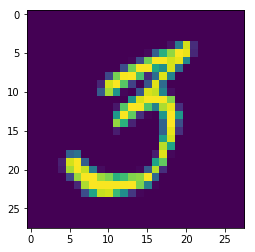

3


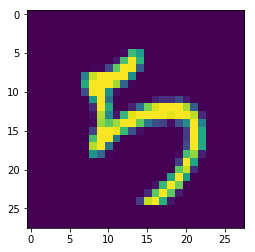

2


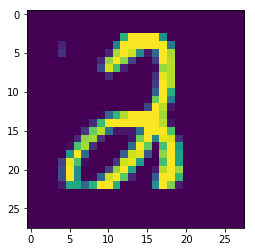

6


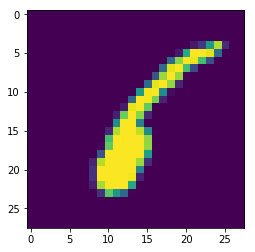

In [103]:
def showPredictionImage(index):
    print(np.argmax(pred[index]))
    plt.imshow(X_test[index].reshape(28,28))
    plt.show()
showPredictionImage(3)
showPredictionImage(5)
showPredictionImage(59)
showPredictionImage(138)
showPredictionImage(275)
showPredictionImage(498)
showPredictionImage(1235)

In [104]:
with open('pred_keras.csv', 'w') as f:
    f.write("ImageId,Label\n")
    for i, prediction in enumerate(pred):
        f.write(str(i+1) + "," + str(np.argmax(prediction)) + "\n")